adapted from human.stats_and_figures.ipynb

In [175]:
import numpy as np
import pandas as pd
import glob
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 10)

In [176]:
dnds_df = pd.read_csv('../results/Ensembl98_chicken/chicken.30_species_dNdS.all_genes.tsv',sep='\t',index_col=[0,1])

In [200]:
dnds_df['reptile_avg_dNdS']=dnds_df.loc[:,'abrachyrhynchus_dNdS':'zalbicollis_dNdS'].mean(axis=1)

In [201]:
dnds_df

,,abrachyrhynchus_dNdS,acarolinensis_dNdS,ahaastii_dNdS,aowenii_dNdS,applatyrhynchos_dNdS,arowi_dNdS,cabingdonii_dNdS,ccaeruleus_dNdS,cjaponica_dNdS,cpbellii_dNdS,...,mvitellinus_dNdS,nmeleagris_dNdS,nperdicaria_dNdS,pmajor_dNdS,psinensis_dNdS,scanaria_dNdS,smerianae_dNdS,spunctatus_dNdS,zalbicollis_dNdS,reptile_avg_dNdS
Gene stable ID,Gene name,,,,,,,,,,,,,,,,,,,,,
ENSGALG00000000003,PANX2,0.040064,0.063331,0.055618,0.055618,0.033333,0.032274,0.084858,0.058824,0.117388,0.066391,...,0.077175,0.131676,0.033138,0.060713,0.087354,0.072792,0.061477,NaN,0.057296,0.069405
ENSGALG00000000011,C10orf88,0.476299,0.249495,0.402878,0.447086,0.409735,0.505535,NaN,NaN,0.321538,0.502871,...,NaN,0.298759,NaN,0.487453,0.368580,NaN,0.133712,0.464826,NaN,0.396707
ENSGALG00000000044,WFIKKN1,0.042545,0.020462,0.000999,0.001039,0.043364,0.001021,0.001083,NaN,0.043991,0.001003,...,0.053841,0.099718,0.001000,0.042636,NaN,0.001730,0.001007,NaN,NaN,0.030648
ENSGALG00000000048,NaN,0.073071,NaN,0.029864,0.033895,0.025335,0.044947,0.036032,NaN,0.081281,0.035015,...,NaN,0.104419,0.034972,NaN,NaN,NaN,0.001759,0.034288,NaN,0.048765
ENSGALG00000000055,LAMTOR3,NaN,0.007919,0.055103,0.053029,NaN,0.055103,NaN,0.042839,NaN,NaN,...,0.073643,NaN,0.144333,NaN,NaN,NaN,0.003803,0.002640,0.094077,0.062023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSGALG00000055075,FMNL3,0.001087,0.015407,NaN,NaN,NaN,0.001033,0.046504,NaN,NaN,0.042698,...,NaN,0.020117,0.030533,0.045506,NaN,0.041220,0.002717,0.024323,NaN,0.028027
ENSGALG00000055081,SEMA4C,0.046896,NaN,0.047596,0.055469,0.047000,0.055199,0.052817,NaN,0.058608,0.001538,...,NaN,0.118243,NaN,NaN,NaN,NaN,0.002598,NaN,NaN,0.046023
ENSGALG00000055094,CD63,NaN,0.008954,NaN,NaN,NaN,NaN,0.005355,NaN,0.229987,NaN,...,NaN,NaN,0.033586,NaN,NaN,NaN,0.004622,0.002879,NaN,0.042108


In [202]:
med_dnds=dnds_df.reptile_avg_dNdS.median(axis=0)

In [205]:
med_dnds # use for benchmark in graphics

0.11756811233529922

In [5]:
# dnds_df.drop(['Gene stable ID', 'Gene description'],axis=1,inplace=True)

In [206]:
# Get a list of species name (including "reptile_avg" of all reptilian species)
species_list=[]
for species in dnds_df.columns:
    species_list.append(species[:-5])

In [244]:
len(species_list)

31

In [245]:
species_list

['abrachyrhynchus',
 'acarolinensis',
 'ahaastii',
 'aowenii',
 'applatyrhynchos',
 'arowi',
 'cabingdonii',
 'ccaeruleus',
 'cjaponica',
 'cpbellii',
 'cporosus',
 'cpugnax',
 'cpygmaea',
 'dnovaehollandiae',
 'falbicollis',
 'gagassizii',
 'jhyemalis',
 'lcoronata',
 'lsdomestica',
 'mgallopavo',
 'mundulatus',
 'mvitellinus',
 'nmeleagris',
 'nperdicaria',
 'pmajor',
 'psinensis',
 'scanaria',
 'smerianae',
 'spunctatus',
 'zalbicollis',
 'reptile_avg']

In [209]:
# Find chicken orthologs of mouse genes
chicken_ortho_df = pd.read_csv('../data/chicken.orthologs_of_mouse_genes.tsv', sep='\t', index_col=['Gene name'])
chicken_ortho_df.replace(['ortholog_one2many','ortholog_many2many'],np.nan,inplace=True)
chicken_ortho_df.dropna(inplace=True)
# drop genes with duplicated names
chicken_ortho_df=chicken_ortho_df.loc[~chicken_ortho_df.index.duplicated(keep=False)]

In [210]:
chicken_ortho_df

,Chicken gene name,Chicken homology type,"Chicken orthology confidence [0 low, 1 high]"
Gene name,,,
mt-Cytb,CYTB,ortholog_one2one,1
mt-Nd6,ND6,ortholog_one2one,1
mt-Nd5,ND5,ortholog_one2one,1
mt-Nd4,ND4,ortholog_one2one,1
mt-Nd3,ND3,ortholog_one2one,1
...,...,...,...
Etv6,ETV6,ortholog_one2one,1
Cbx8,CBX8,ortholog_one2one,1
Phc3,PHC3,ortholog_one2one,1


In [211]:
celltype_list=['neuron','endothelia','glia','astrocyte','microglia','oligodendrocyte']

In [225]:
df_list=[]
df_dict={}
arr_dict={}
avg_dnds_arr_dict={}
for celltype in celltype_list:
    df=pd.read_csv('../results/mouse.celltype-specific_genes/protein-coding_w_dNdS/'+celltype+'.list.txt',sep='\t',names=['Mouse gene name'])
    df=pd.merge(df,chicken_ortho_df,how='inner',left_on='Mouse gene name',right_index=True)
    df=pd.merge(df,dnds_df,how='inner',left_on='Chicken gene name',right_on='Gene name')
    df.drop(['Chicken homology type','Chicken orthology confidence [0 low, 1 high]'],axis=1,inplace=True)
    df_dict[celltype]=df.copy(deep=True)
    df['Cell Type']=celltype
    df_list.append(df)
    array=df.loc[:,'abrachyrhynchus_dNdS':'zalbicollis_dNdS'].to_numpy()
    array=array[~np.isnan(array)]
    avg_array=df.loc[:,'reptile_avg_dNdS'].to_numpy()
    avg_array=avg_array[~np.isnan(avg_array)]
    arr_dict[celltype]=array
    avg_dnds_arr_dict[celltype]=avg_array
concat_df=pd.concat(df_list)

In [275]:
celltype_list.append('glia')

In [282]:
for celltype in celltype_list:
    df_dict[celltype]['Chicken gene name'].to_csv('../results/chicken.celltype-specific_genes/protein-coding_w_dNdS/'+celltype+'.list.txt', sep='\t', index=False, header=False)

# Statistics

In [28]:
from scipy import stats
import heapq

### All data points (no averaging across 30 species)

In [29]:
# NEG three cell types analysis
stats.mannwhitneyu(arr_dict['neuron'],arr_dict['endothelia'],alternative="two-sided")
stats.mannwhitneyu(arr_dict['neuron'],arr_dict['glia'],alternative="two-sided")
stats.mannwhitneyu(arr_dict['glia'],arr_dict['endothelia'],alternative="two-sided")
stats.kruskal(arr_dict['neuron'],arr_dict['glia'],arr_dict['endothelia'])

MannwhitneyuResult(statistic=146913519.5, pvalue=5.18146514848924e-270)

MannwhitneyuResult(statistic=180260558.0, pvalue=4.940809886234241e-228)

MannwhitneyuResult(statistic=146832246.5, pvalue=2.5747149760016655e-06)

KruskalResult(statistic=1598.3840087499423, pvalue=0.0)

In [30]:
# NEAMO five cell types analysis
stats.mannwhitneyu(arr_dict['neuron'],arr_dict['astrocyte'],alternative="two-sided")
stats.mannwhitneyu(arr_dict['neuron'],arr_dict['microglia'],alternative="two-sided")
stats.mannwhitneyu(arr_dict['neuron'],arr_dict['oligodendrocyte'],alternative="two-sided")
stats.kruskal(arr_dict['neuron'],arr_dict['endothelia'],arr_dict['astrocyte'],arr_dict['microglia'],arr_dict['oligodendrocyte'])

MannwhitneyuResult(statistic=151945151.5, pvalue=2.381316725490872e-136)

MannwhitneyuResult(statistic=136638584.0, pvalue=0.0)

MannwhitneyuResult(statistic=102008682.0, pvalue=2.970897619808909e-42)

KruskalResult(statistic=2026.9900905308862, pvalue=0.0)

In [31]:
negamo_stats_df = pd.DataFrame(
    columns=['Celltype','Median_dNdS',
             'Confidence_Interval_Low','Confidence_Interval_High'])

for celltype in ['neuron','endothelia','glia','astrocyte','microglia','oligodendrocyte']:
        arr=arr_dict[celltype]
        med=np.median(arr)
        low = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[0]
        high = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[1]
        CI_low = heapq.nsmallest(low.astype(int),arr)[-1]
        CI_high = heapq.nsmallest(high.astype(int),arr)[-1]
        negamo_stats_df = negamo_stats_df.append(
            {'Celltype':celltype,'Median_dNdS':med,
             'Confidence_Interval_Low':CI_low,'Confidence_Interval_High':CI_high},
            ignore_index=True)

In [32]:
negamo_stats_df

,Celltype,Median_dNdS,Confidence_Interval_Low,Confidence_Interval_High
0,neuron,0.085461,0.084235,0.086641
1,endothelia,0.120967,0.119153,0.122731
2,glia,0.115447,0.113513,0.117028
3,astrocyte,0.109927,0.107991,0.111971
4,microglia,0.128048,0.125895,0.130131
5,oligodendrocyte,0.098911,0.097112,0.101031


### Individual Species (including each gene's dN/dS ratio averaged across 92 species) 

In [252]:
xls = pd.ExcelFile('../data/species.xlsx')
common_name_df=pd.read_excel(xls,'Reptilia',index_col=0)
common_name_df=common_name_df.append(pd.Series(['reptile_avg','reptile_avg','reptile_avg'],name='reptile_avg',index=common_name_df.columns))

In [253]:
common_name_df

,SpeciesCommonName,SpeciesLatinName,Order
Ensembl98ID,,,
abrachyrhynchus,Pink-footed goose,Anser brachyrhynchus,Anseriformes
acarolinensis,Anole lizard,Anolis carolinensis,Squamata
ahaastii,Great spotted kiwi,Apteryx haastii,Apterygiformes
aowenii,Little spotted kiwi,Apteryx owenii,Apterygiformes
applatyrhynchos,Duck,Anas platyrhynchos platyrhynchos,Anseriformes
...,...,...,...
scanaria,Common canary,Serinus canaria,Passeriformes
smerianae,Argentine black and white tegu,Salvator merianae,Squamata
spunctatus,Tuatara,Sphenodon punctatus,Rhynchocephalia


In [254]:
full_dict = {} # This dictionary stores dataframes for later use 
descriptive_stats_df = pd.DataFrame(
    columns=['Species','Celltype','Median_dNdS',
             'Confidence_Interval_Low','Confidence_Interval_High'])
for species in species_list:
    full_dict[species] = {}
    for celltype in ['neuron','endothelia','glia','astrocyte','microglia','oligodendrocyte']:
        df=df_dict[celltype][[species+'_dNdS']]
        full_dict[species][celltype]=df.dropna().values.flatten() # Jan 22, 2022 added "flatten", else stats.kruskal will give error stating this is not one-dimentional
        arr=df.iloc[:,0].dropna().values
        med=np.median(arr)
        low = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[0]
        high = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[1]
        CI_low = heapq.nsmallest(low.astype(int),arr)[-1]
        CI_high = heapq.nsmallest(high.astype(int),arr)[-1]
        descriptive_stats_df = descriptive_stats_df.append(
            {'Species':species,'Celltype':celltype,'Median_dNdS':med,
             'Confidence_Interval_Low':CI_low,'Confidence_Interval_High':CI_high},
            ignore_index=True)

descriptive_stats_df=pd.merge(left=common_name_df,right=descriptive_stats_df,left_index=True,right_on='Species',how='right')
descriptive_stats_df.set_index('SpeciesCommonName',inplace=True)
descriptive_stats_df.drop(['SpeciesLatinName','Order','Species'],axis=1,inplace=True)

In [255]:
descriptive_stats_df

,Celltype,Median_dNdS,Confidence_Interval_Low,Confidence_Interval_High
SpeciesCommonName,,,,
Pink-footed goose,neuron,0.091884,0.086307,0.099304
Pink-footed goose,endothelia,0.134864,0.121879,0.149940
Pink-footed goose,glia,0.124538,0.113309,0.136056
Pink-footed goose,astrocyte,0.119959,0.108085,0.135843
Pink-footed goose,microglia,0.144287,0.127576,0.154573
...,...,...,...,...
reptile_avg,endothelia,0.121186,0.111016,0.131389
reptile_avg,glia,0.114562,0.104951,0.123963
reptile_avg,astrocyte,0.111828,0.100728,0.122607


##### Descriptive Statistics: median and confidence interval

In [35]:
descriptive_stats_df

NameError: name 'descriptive_stats_df' is not defined

In [256]:
# add a tab to existing descriptive statistics excel file:

from openpyxl import load_workbook

path = '../results/celltype-specific_descriptive_stats.xlsx'
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl') # note the engine
# writer = pd.ExcelWriter(path, engine = 'xlsxwriter') # use this engine if creating a new file
writer.book = book

descriptive_stats_df.to_excel(writer, sheet_name = 'chicken reference genome',index=True)

writer.save()
writer.close()

### Inferential statistics: Kruskal Wallis H and Mann Whitney U between celltypes

In [257]:
inferential_stats_df=pd.DataFrame(
    columns=['Species','Kruskal H NEG','Kruskal p NEG',
             'Kruskal H NEAMO','Kruskal p NEAMO',
             'Mann U NG','Mann p NG',
             'Mann U NE','Mann p NE',
             'Mann U EG','Mann p EG',
             'Mann U NA','Mann p NA',
             'Mann U NM','Mann p NM',
             'Mann U NO','Mann p NO'])

for species in species_list:

    h_NEG,kp_NEG=stats.kruskal(
        full_dict[species]['neuron'],
        full_dict[species]['endothelia'],
        full_dict[species]['glia'])

    h_NEAMO,kp_NEAMO=stats.kruskal(
        full_dict[species]['neuron'],
        full_dict[species]['endothelia'],
        full_dict[species]['astrocyte'],
        full_dict[species]['microglia'],
        full_dict[species]['oligodendrocyte'])
    
    # June 18, 2020: debug on Jan_20_2020-Confirming_w_Couple_Species-Ensembl98Mouse
    # June 24, 2020: debug stats.mannwhitneyu(), include alternative="two-sided", 
    # default "None" is deprecated and generate a smaller p value
    # Now avoid nan values influencing test results.
    # U statistics and p values from Mann Whitney's U test 
    # comparing Neuron-specific genes and Glia-specific genes' dN/dS ratios
    u_NG, mp_NG=stats.mannwhitneyu(
        full_dict[species]['neuron'],
        full_dict[species]['glia'],
        alternative="two-sided")
    
    # similarly, compare neuron-specific genes and endothelia-specific genes
    u_NE, mp_NE=stats.mannwhitneyu(
        full_dict[species]['neuron'],
        full_dict[species]['endothelia'],
        alternative="two-sided")
    
    # and endothelia vs glia
    u_EG, mp_EG=stats.mannwhitneyu(
        full_dict[species]['glia'],
        full_dict[species]['endothelia'],
        alternative="two-sided")
    
    # and neuron vs the three glial subtypes
    u_NA, mp_NA=stats.mannwhitneyu(
        full_dict[species]['neuron'],
        full_dict[species]['astrocyte'],
        alternative="two-sided")
    
    u_NM, mp_NM=stats.mannwhitneyu(
        full_dict[species]['neuron'],
        full_dict[species]['microglia'],
        alternative="two-sided")
    
    u_NO, mp_NO=stats.mannwhitneyu(
        full_dict[species]['neuron'],
        full_dict[species]['oligodendrocyte'],
        alternative="two-sided")
    
    inferential_stats_df = inferential_stats_df.append(
            {'Species':species,'Kruskal H NEG':h_NEG,'Kruskal p NEG':kp_NEG,
            'Kruskal H NEAMO':h_NEAMO,'Kruskal p NEAMO':kp_NEAMO,
            'Mann U NG':u_NG,'Mann p NG':mp_NG,
            'Mann U NE':u_NE,'Mann p NE':mp_NE,
            'Mann U EG':u_EG,'Mann p EG':mp_EG,
            'Mann U NA':u_NA,'Mann p NA':mp_NA,
            'Mann U NM':u_NM,'Mann p NM':mp_NM,
            'Mann U NO':u_NO,'Mann p NO':mp_NO},
            ignore_index=True)
    
inferential_stats_df=pd.merge(left=common_name_df,right=inferential_stats_df,left_index=True,right_on='Species',how='right')
inferential_stats_df.set_index('SpeciesCommonName',inplace=True)
inferential_stats_df.drop(['SpeciesLatinName','Order','Species'],axis=1,inplace=True)

In [258]:
inferential_stats_df

,Kruskal H NEG,Kruskal p NEG,Kruskal H NEAMO,Kruskal p NEAMO,Mann U NG,Mann p NG,Mann U NE,Mann p NE,Mann U EG,Mann p EG,Mann U NA,Mann p NA,Mann U NM,Mann p NM,Mann U NO,Mann p NO
SpeciesCommonName,,,,,,,,,,,,,,,,
Pink-footed goose,60.504459,7.271492e-14,80.960846,1.089981e-16,235455.0,1.203383e-09,184985.0,2.861435e-12,190603.0,0.189530,191013.0,3.601737e-07,175576.0,1.764660e-13,134816.0,0.074332
Anole lizard,32.586631,8.392724e-08,37.579298,1.368350e-07,187156.0,2.758713e-05,148029.0,1.004180e-07,136356.5,0.364885,163314.0,7.358177e-04,144206.0,3.361118e-06,102349.0,0.043573
Great spotted kiwi,51.913670,5.334451e-12,62.937464,6.994692e-13,198572.0,2.036300e-09,161793.0,6.272147e-10,166352.5,0.500459,165335.0,4.978282e-06,152165.0,9.509846e-12,105891.0,0.002354
Little spotted kiwi,55.258503,1.001771e-12,66.105654,1.504848e-13,198196.0,8.135180e-11,168998.5,1.121042e-09,177461.5,0.901576,162091.0,4.010270e-07,157007.0,1.227350e-12,108075.0,0.000637
Duck,47.567628,4.686200e-11,59.204304,4.262857e-12,202023.0,9.050855e-08,157453.0,5.156950e-10,157431.0,0.227821,165719.0,3.367767e-05,153419.0,2.403329e-10,115113.0,0.022477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Common canary,63.977537,1.280721e-14,80.236603,1.551952e-16,188714.0,1.351753e-11,158668.0,1.424102e-11,164052.0,0.698057,156903.0,8.600250e-08,144691.0,7.626025e-15,105105.0,0.003490
Argentine black and white tegu,48.657330,2.717659e-11,52.832757,9.236826e-11,225600.0,2.502596e-08,182989.0,8.377720e-10,172327.5,0.478558,187576.0,8.756957e-08,181015.0,6.639195e-07,132306.0,0.004824
Tuatara,50.327611,1.178957e-11,61.524975,1.386551e-12,183106.0,9.927752e-09,150515.0,5.429553e-10,149116.0,0.354913,150065.0,2.543740e-06,142899.0,2.769429e-10,104193.0,0.019813


In [259]:
# Write to existing excel file for inferential stats
path = '../results/celltype-specific_inferential_stats.xlsx'
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl') # note the engine
# writer = pd.ExcelWriter(path, engine = 'xlsxwriter') # use this engine if creating a new file
writer.book = book
inferential_stats_df.to_excel(writer, sheet_name = 'chicken reference genome', index=True)

writer.save()
writer.close()

In [272]:
# neuron-specific genes are significantly lower in dN/dS than all chicken protein-coding genes
stats.mannwhitneyu(
        full_dict[species]['neuron'],
        dnds_df['reptile_avg_dNdS'],
        alternative="two-sided")

MannwhitneyuResult(statistic=5044485.5, pvalue=6.550695229120142e-22)

# Visualization

In [88]:
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.ticker as mtick
from statannot import add_stat_annotation
matplotlib.rcParams['figure.dpi']= 300

In [235]:
sns.set_style('ticks')
palette={'endothelia':'tab:blue','glia':'tab:green','neuron':'tab:red','oligodendrocyte':'lightblue','astrocyte':'lightgreen','microglia':'tab:orange'}

In [227]:
avg_dnds_arr_dict['microglia'].shape

(615,)

In [234]:
for celltype in celltype_list:
    print(celltype)
    avg_dnds_arr_dict[celltype].shape[0] # number of genes
    np.min(avg_dnds_arr_dict[celltype])
    np.median(avg_dnds_arr_dict[celltype]) # median of average dNdS
    np.max(avg_dnds_arr_dict[celltype])

neuron


921

0.005157119635831637

0.08953227004985978

0.5900776449602844

endothelia


631

0.0029353023464800715

0.12118581294888228

0.6334421033632712

glia


763

0.00239340132413253

0.11456209063190649

0.8566541379825858

astrocyte


603

0.006024876280855508

0.1118280236019118

0.6255673132681042

microglia


615

0.0023615567462460445

0.12584601922198796

0.8566541379825858

oligodendrocyte


393

0.00239340132413253

0.10125011347676229

0.5642958793016887

### Distribution without benchmarks except all gene median

In [240]:
celltype_list.remove('glia')

(0.0, 80.0)

Text(0.5, 0, '(less free to vary)                                       dN/dS                                       (more free to vary)')

Text(0, 0.5, 'Number of Genes')

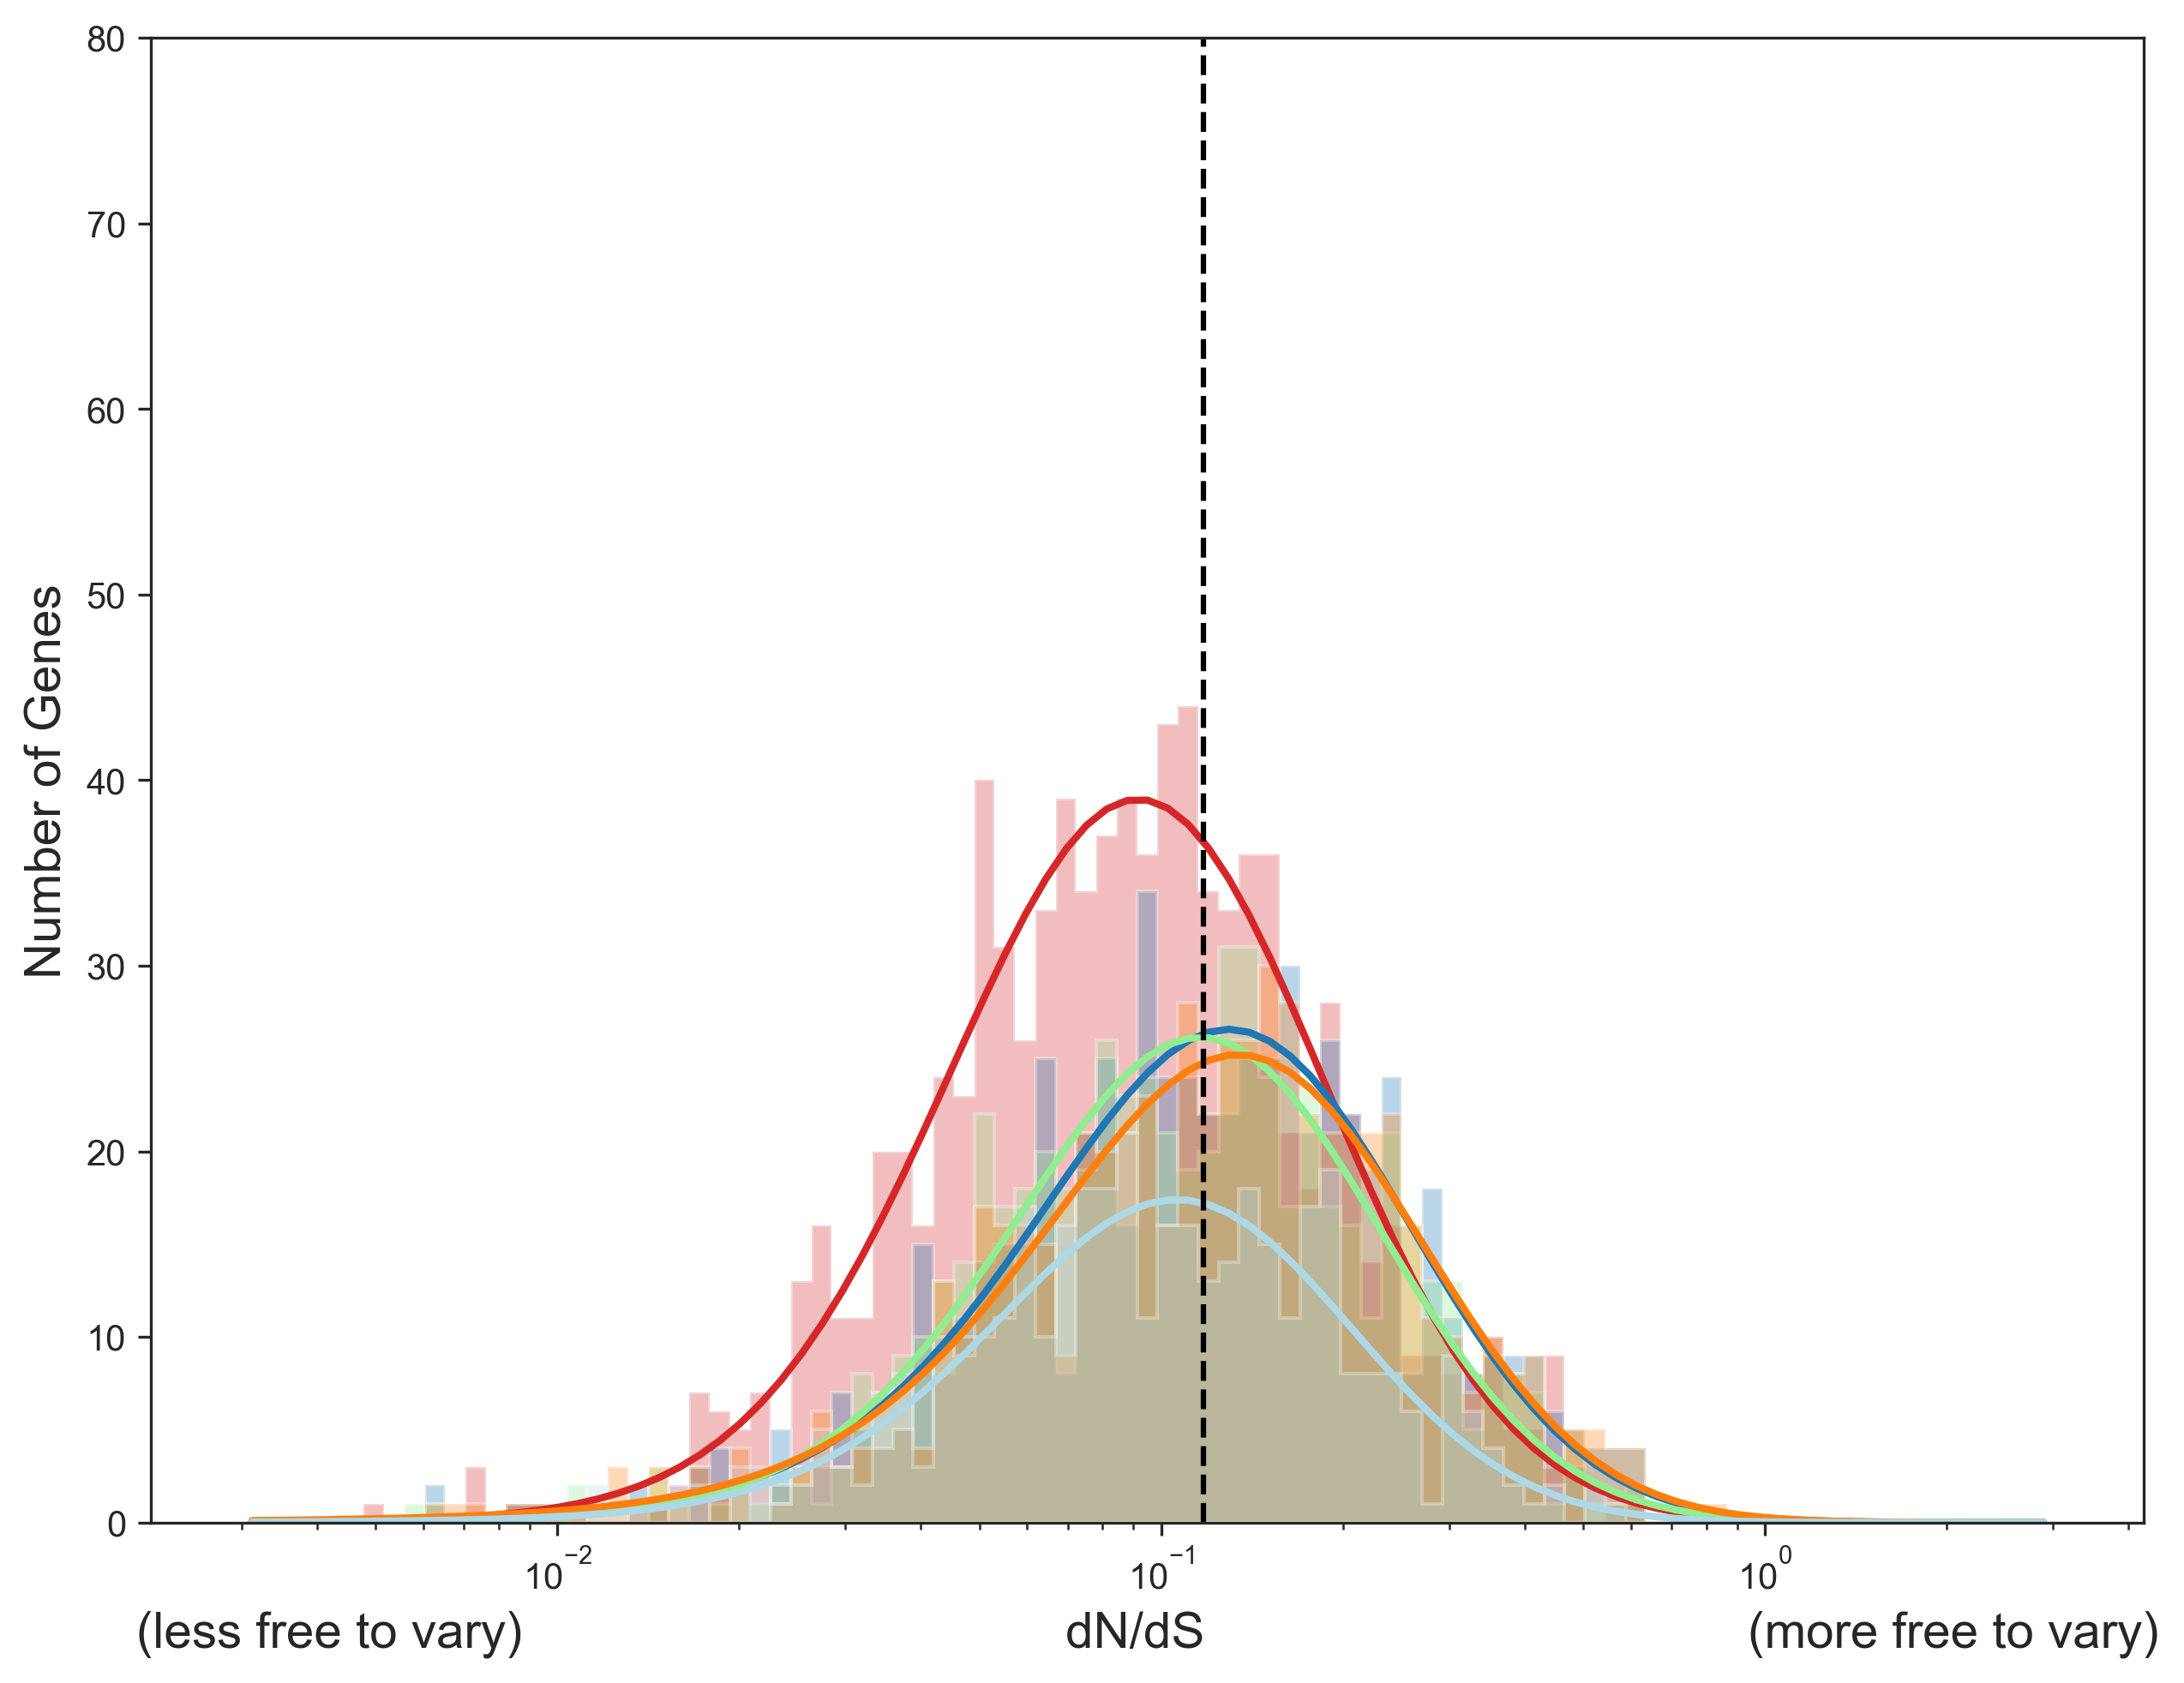

In [243]:
fig = plt.figure(figsize=(10,7.5))
grid = plt.GridSpec(nrows=1,ncols=1)
distr_plot = fig.add_subplot(grid[:,:])
bins=np.logspace(np.log10(0.003),np.log10(3), 90)
bins_cntr = (bins[1:] + bins[:-1]) / 2

for celltype in celltype_list:
    counts, bin_edges, ignored = distr_plot.hist(avg_dnds_arr_dict[celltype],bins,histtype='stepfilled',alpha=0.3,color=palette[celltype])
    area_hist = ((bin_edges[1:] - bin_edges[:-1]) * counts).sum()
    shape, loc, scale = stats.lognorm.fit(avg_dnds_arr_dict[celltype])
    # pdf-values using cdf 
    fit_log_cntr_ = stats.lognorm.cdf(bins, shape, loc=loc, scale=scale)
    fit_log_cntr = np.diff(fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, fit_log_cntr * counts.sum(),color=palette[celltype],ls='-', linewidth=2)

distr_plot.axvline(med_dnds,color='black',ls='--')

# Axis labels
distr_plot.set_ylim(top=80)
distr_plot.set_xlabel(fontsize=14,xlabel='(less free to vary)                                       dN/dS                                       (more free to vary)')
distr_plot.set_ylabel(fontsize=14,ylabel='Number of Genes')
distr_plot.set_xscale('log')

plt.show()
fig.savefig('../figures/chicken.avg_dNdS_distribution.5celltypes.svg')

### Benchmarks?

Jan 28, 2022: Using the chicken ortholog of mouse benchmark genes might be problematic. E.g., there is only one MHC genes' chicken ortholog. All chicken protein-coding genes are kept as benchmark. 

In [91]:
benchmark_file = pd.ExcelFile('../data/benchmarks.xlsx')
benchmark_dict={}
for sheet_name in benchmark_file.sheet_names:
    df=pd.read_excel(benchmark_file,sheet_name=sheet_name,index_col=0,names=['mouse_avg_dNdS'])
    benchmark_dict.update({sheet_name:df})

In [148]:
benchmark_dict['House Keeping Genes']

,mouse_avg_dNdS
Aaas,0.088135
Aagab,0.135716
Aamp,0.022372
Aar2,0.093255
Aars,0.047271
...,...
Zswim1,0.112086
Zswim7,0.211968
Zswim8,0.060767
Zw10,0.144054


In [152]:
pd.merge(benchmark_dict['House Keeping Genes'],avg_dnds_df,left_index=True, right_on='Mouse gene name',how='inner').drop('mouse_avg_dNdS',axis=1)

,avg_dNdS,Mouse gene name,Chicken gene name
8649,0.100223,Aaas,AAAS
3159,0.155321,Aagab,AAGAB
4870,0.050817,Aamp,AAMP
289,0.139294,Aar2,AAR2
639,0.061662,Aars,AARS
...,...,...,...
8403,0.012630,Zranb1,ZRANB1
4820,0.037759,Zranb2,ZRANB2
7378,0.153337,Zswim7,ZSWIM7
1980,0.071651,Zswim8,ZSWIM8


In [160]:
benchmark_dNdS_dict={}
benchmark_median_dNdS_dict={}

for key in benchmark_dict:
    df=benchmark_dict[key]
    df=pd.merge(df,avg_dnds_df,left_index=True, right_on='Mouse gene name',how='inner')
    df.drop('mouse_avg_dNdS',axis=1,inplace=True)
    df.rename(columns={'avg_dNdS':'chicken_avg_dNdS'},inplace=True)
    benchmark_dNdS_dict[key]=df
    benchmark_median_dNdS_dict[key]=df['chicken_avg_dNdS'].median()
    

In [161]:
benchmark_median_dNdS_dict

{'House Keeping Genes': 0.09705276098997316,
 'MHC': 0.048142552275769426,
 'ATPase': 0.09027501344247259,
 'Immune System Genes': 0.10118694928265182}

In [168]:
benchmark_dNdS_dict['MHC'] #This could be problematic since there is only one chicken ortholog to mouse MHC genes 

,chicken_avg_dNdS,Mouse gene name,Chicken gene name
24,0.048143,H2-DMa,DMA
